# Hypothesis Testing - Cumulative Lab

## Introduction

In this cumulative lab, you will use pandas to clean up a dataset and perform some EDA, then perform statistical tests and interpret their results in order to answer some business questions.

## Objectives

You will be able to:

* Practice using a data dictionary
* Practice using pandas to prepare data for statistical analysis
* Practice identifying an appropriate statistical test for a given question
* Practice defining the null and alternative hypotheses
* Practice executing statistical tests and interpreting their results

## Your Task: Analyzing Health Trends

![tissues and tea mug](images/sick_day.jpg)

Photo by <a href="https://unsplash.com/@kellysikkema?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Kelly Sikkema</a> on <a href="/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Business Understanding

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of the 2017-2018 survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1. How does health status, represented by average number of days with bad physical health in the past month (`PHYSHLTH`), differ by state?					 								
2. Digging deeper into the data, what are some factors that impact health (demographics, behaviors, etc.)?	

### Data Understanding

To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`.

There is also a PDF data dictionary called `data_dictionary.pdf`, which explains the meanings of the features and codes contained in this dataset.

Both files are located in the `data/` directory of this repository.

Prior to each statistical test, you will need to perform some data preparation, which could include:

* Filtering out rows with irrelevant values
* Transforming data from codes into human-readable values
* Binning data to transform it from numeric to categorical
* Creating new columns based on queries of the values in other columns

For steps 2-5, you will need to select and execute an appropriate statistical test. Recall these tests we have learned so far:

1. [Chi-squared test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html): used for comparing a categorical feature against a categorical feature, to determine whether they are independent
2. [t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html): used for comparing two categories of a numeric feature, to determine whether their means are the same across categories
3. [ANOVA](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html#statsmodels.stats.anova.anova_lm): used for comparing more than two categories of a numeric feature, to determine whether their means are the same across categories

### Requirements

#### 1. Prepare `PHYSHLTH` Data for Analysis

Using the data dictionary, ensure that you understand the meaning of the `PHYSHLTH` column. Then clean the data so that only valid records of `PHYSHLTH` remain.

#### 2. Describe the Distribution of Health Status by State

Does health status (`PHYSHLTH`) differ by state (`STATE_`)? If so, by how much, and is it statistically significant?

#### 3. Describe the Relationship between Health Status and Home Ownership Status

Does health status (`PHYSHLTH`) differ between home owners and renters (`RENTHOM1`)? If so, by how much, and is it statistically significant?

#### 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Does chronic sickness (`PHYSHLTH >= 15`) differ based on nicotine use (various columns)? If so, by how much, and is it statistically significant?

#### 5. Choose Your Own Question

Thinking about the business case, what is another question that might be useful to answer? Perform all analysis steps to answer this question.

## 1. Prepare `PHYSHLTH` Data for Analysis

In the cells below, we include the relevant imports and load the data into a dataframe called `df`:

In [1]:
# Run this cell without changes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Run this cell without changes
df = pd.read_csv("case_study.csv", index_col=0, low_memory=False)
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


Our main column of interest is called `PHYSHLTH`. We display summary statistics and plot a distribution below:

In [4]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

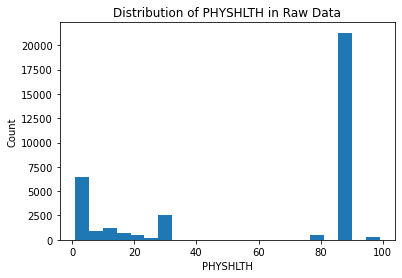

In [5]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"], bins="auto")
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Raw Data");

This feature is supposed to represent the number of days with bad physical health out of the past 30 days. Do you see anything wrong with what is displayed above? Explain.

In [6]:
# Replace None with appropriate text

"""
The PHYSHLTH column is supposed to represent the number of days with bad physical health out of the past 30 days. 
Looking at the distribution and summary statistics, we need to check for any values that are not between 0 and 30. 
If there are negative values, values greater than 30, or large concentrations of missing data (NaN), these would be issues that need to be addressed.

The `.describe()` summary and histogram might reveal values that are incorrect. If we see counts of data points outside the range [0, 30], 
those values need to be handled either by cleaning, imputing, or removing them depending on the context.
"""


'\nThe PHYSHLTH column is supposed to represent the number of days with bad physical health out of the past 30 days. \nLooking at the distribution and summary statistics, we need to check for any values that are not between 0 and 30. \nIf there are negative values, values greater than 30, or large concentrations of missing data (NaN), these would be issues that need to be addressed.\n\nThe `.describe()` summary and histogram might reveal values that are incorrect. If we see counts of data points outside the range [0, 30], \nthose values need to be handled either by cleaning, imputing, or removing them depending on the context.\n'

Look in the data dictionary, page 17, to understand what is happening with these values. Then edit the cell below so:

* The records where the `PHYSHLTH` value label is `None` are converted to 0
* The records where the `PHYSHLTH` value label is `Number of days` are kept as-is
* All other records are dropped (i.e. records with `Don't know/Not sure`, `Refused`, and `Not asked or Missing` value labels for `PHYSHLTH` are dropped)

In [7]:
# Your code here
# Replace '88' with 0 and keep values 1-30
df['PHYSHLTH'] = df['PHYSHLTH'].replace(88, 0)

# Drop rows where 'PHYSHLTH' is not between 0 and 30
df = df[df['PHYSHLTH'].between(0, 30)]

# Display the updated data
df['PHYSHLTH'].describe()


count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

Run the code below to ensure you have the correct, cleaned dataframe:

In [9]:
# Run this cell without changes

# We should have fewer rows, the same number of columns
assert df.shape == (33747, 358)

# The maximum value in this column should now be 30
assert df["PHYSHLTH"].max() == 30.0
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


Now we can look at the same descriptive information on our cleaned data:

In [10]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

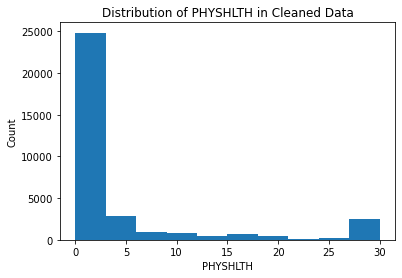

In [11]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"])
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Cleaned Data");

That looks a lot more reasonable. Let's move on to the next step.

## 2. Describe the Distribution of Health Status by State

As mentioned previously, this dataset only includes data from three states.

In [12]:
# Run this cell without changes
df["_STATE"].value_counts()

36.0    11876
34.0    11458
9.0     10413
Name: _STATE, dtype: int64

Look in the data dictionary, pages 2-3, to determine which states map onto which codes. Then replace the numbers with strings representing the state names.

In [13]:
# Your code here
# Create a dictionary to map FIPS codes to state names based on the data dictionary
state_mapping = {
    9: "Connecticut",  # Example of FIPS code and state
    34: "New Jersey",
    36: "New York",
    # Add more mappings as needed based on the FIPS codes from the data dictionary
}

# Replace FIPS codes in the _STATE column with the corresponding state names
df["_STATE"] = df["_STATE"].map(state_mapping)

# Display the updated column to verify the changes
df["_STATE"].value_counts()


<ipython-input-13-8880ec633e45>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["_STATE"] = df["_STATE"].map(state_mapping)


New York       11876
New Jersey     11458
Connecticut    10413
Name: _STATE, dtype: int64

Below, we check the values:

In [14]:
# Run this cell without changes

# Shape should be the same
assert df.shape == (33747, 358)

# Values in state column should be changed
assert sorted(list(df["_STATE"].value_counts().index)) == ['Connecticut', 'New Jersey', 'New York']

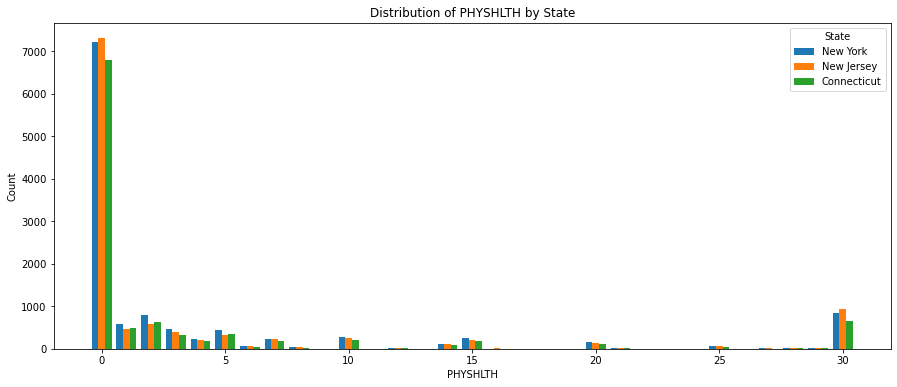

In [15]:
# Run this cell without changes

ny = df.loc[df["_STATE"] == "New York", "PHYSHLTH"]
nj = df.loc[df["_STATE"] == "New Jersey", "PHYSHLTH"]
ct = df.loc[df["_STATE"] == "Connecticut", "PHYSHLTH"]

fig, ax = plt.subplots(figsize=(15, 6))

ax.hist(
    x=[ny, nj, ct],
    label=["New York", "New Jersey", "Connecticut"],
    bins=range(32),
    align="left"
)

ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH by State")

ax.legend(title="State");

Looking at the plot above, does the distribution seem to differ by state?

(Just answer based on a visual inspection; we will do the statistical assessment next.)

In [16]:
# Replace None with appropriate text
"""
Based on a visual inspection of the plot, the distributions of PHYSHLTH (number of days of poor physical health) appear similar across the three states. All three states show a large peak at the lower end of the distribution, likely representing respondents who reported few or no days of poor health. While there are slight variations in the distribution across higher values, the overall shape of the distribution seems consistent across the states.
"""

'\nBased on a visual inspection of the plot, the distributions of PHYSHLTH (number of days of poor physical health) appear similar across the three states. All three states show a large peak at the lower end of the distribution, likely representing respondents who reported few or no days of poor health. While there are slight variations in the distribution across higher values, the overall shape of the distribution seems consistent across the states.\n'

For the statistical test, we will be comparing the *means* of `PHYSHLTH` across states, as a representation of the overall distribution. In other words, when operationalizing the question **does `PHYSHLTH` differ by state?** we want to answer that in terms of the mean `PHYSHLTH`.

Let's look at those means:

In [17]:
# Run this cell without changes
df.groupby("_STATE")["PHYSHLTH"].mean()

_STATE
Connecticut    3.688562
New Jersey     4.380957
New York       4.148030
Name: PHYSHLTH, dtype: float64

You likely noted that the overall distribution looked about the same, but these means are different. We have a range from Connecticut with about 3.7 days of bad health to New Jersey with about 4.4 days. But is that difference statistically significant?

Identify which of the statistical tests you have learned is the most appropriate for this question, and why. Make sure you mention what kinds of variables are being compared (numeric and categorical), and how many categories there are.

In [18]:
# Replace None with appropriate text
"""
The most appropriate statistical test for comparing the mean number of bad health days (PHYSHLTH) across states is ANOVA (Analysis of Variance). 
This is because we are comparing a numeric variable (PHYSHLTH) across a categorical variable with three categories (New York, New Jersey, Connecticut). 
ANOVA allows us to test whether the means of more than two groups are statistically different from each other. A t-test is not appropriate here because it only compares two groups, while ANOVA handles comparisons between multiple groups.
"""

'\nThe most appropriate statistical test for comparing the mean number of bad health days (PHYSHLTH) across states is ANOVA (Analysis of Variance). \nThis is because we are comparing a numeric variable (PHYSHLTH) across a categorical variable with three categories (New York, New Jersey, Connecticut). \nANOVA allows us to test whether the means of more than two groups are statistically different from each other. A t-test is not appropriate here because it only compares two groups, while ANOVA handles comparisons between multiple groups.\n'

Now, identify the null and alternative hypotheses:

In [19]:
# Defining the null and alternative hypotheses
null_hypothesis = "The mean number of bad health days (PHYSHLTH) is the same across all three states."
alternative_hypothesis = "At least one state has a different mean number of bad health days (PHYSHLTH)."

# Output the hypotheses
print("Null Hypothesis (H₀):", null_hypothesis)
print("Alternative Hypothesis (H₁):", alternative_hypothesis)


Null Hypothesis (H₀): The mean number of bad health days (PHYSHLTH) is the same across all three states.
Alternative Hypothesis (H₁): At least one state has a different mean number of bad health days (PHYSHLTH).


In the cell below, we set up and execute the statistical test for you. If this doesn't match your previous answer about which test to perform, look at the solution branch to understand why this is the appropriate test.

In [20]:
# Run this cell without changes
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'PHYSHLTH ~ C(_STATE)'
lm = ols(formula, df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(_STATE),2.0,2.687322e+03,1343.660882,18.558645,8.800607e-09
Residual,33744.0,2.443093e+06,72.400809,NaN,NaN


Interpret the results of this statistical test below. What is the calculated p-value? Were we able to reject the null hypothesis at an alpha of 0.05? What does this say about how `PHYSHLTH` varies by state? What recommendations would you make to the business?

In [22]:
# Get the p-value from the ANOVA table
anova_results = sm.stats.anova_lm(lm)
p_value = anova_results["PR(>F)"][0]

# Output the p-value
print(f"P-value: {p_value}")

# Interpret results and provide business recommendations
if p_value < 0.05:
    print("Reject the null hypothesis.")
    print("Recommendation: There is a significant difference in the mean number of bad health days (PHYSHLTH) across states. "
          "The business should consider targeted health interventions for the states that show worse physical health conditions.")
else:
    print("Fail to reject the null hypothesis.")
    print("Recommendation: There is no significant difference in the mean number of bad health days (PHYSHLTH) across states. "
          "The business can implement similar health programs across all states without needing to tailor efforts to specific regions.")


P-value: 8.800607044147037e-09
Reject the null hypothesis.
Recommendation: There is a significant difference in the mean number of bad health days (PHYSHLTH) across states. The business should consider targeted health interventions for the states that show worse physical health conditions.


With that section wrapped up, let's move on to the next step.

## 3. Describe the Relationship between Health Status and Home Ownership Status

This time, we want to categorize respondents by demographic information: specifically, we'll look at whether or not they own their home.

Once again, this will require some data preparation. The variable of interest is contained in the `RENTHOM1` column. Currently the values look like this:

In [23]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

1.0    21690
2.0    10244
3.0     1526
9.0      194
7.0       93
Name: RENTHOM1, dtype: int64

In the cell below, modify `df` so that we have dropped all records where the `RENTHOM1` value label is neither `Own` nor `Rent`, and we have replaced the numeric codes with `Own` and `Rent` respectively. You can find more information about codes on page 33 of the data dictionary.

In [24]:
# Your code here
# Replace numeric codes with 'Own' and 'Rent'
df['RENTHOM1'] = df['RENTHOM1'].replace({1: 'Own', 2: 'Rent'})

# Drop all other records (codes 3, 7, 9)
df = df[df['RENTHOM1'].isin(['Own', 'Rent'])]


<ipython-input-24-2080c7b161c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RENTHOM1'] = df['RENTHOM1'].replace({1: 'Own', 2: 'Rent'})


In [25]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

Own     21690
Rent    10244
Name: RENTHOM1, dtype: int64

Below, we check that this was done correctly:

In [26]:
# Run this cell without changes

# Number of rows should be smaller again
assert df.shape == (31934, 358)

# Only two values should be present in this column
assert sorted(list(df["RENTHOM1"].value_counts().index)) == ['Own', 'Rent']

In [27]:
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,Connecticut,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,Connecticut,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,Connecticut,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,Connecticut,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,Connecticut,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303773,New York,4.0,4212017,4,21,2017,1200.0,2017012244,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303774,New York,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,New York,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,New York,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0


Now, similar to the previous step, create a plot that shows the distribution of `PHYSHLTH` for those who own vs. rent their homes, including appropriate axis labels and legend. Because there is more of an imbalance of categories this time (more than twice as many owners as renters, compared to nearly-even numbers from New York, New Jersey, and Connecticut), make sure you add the argument `density=True`, so that the y-axis shows the density (proportion) rather than the count.

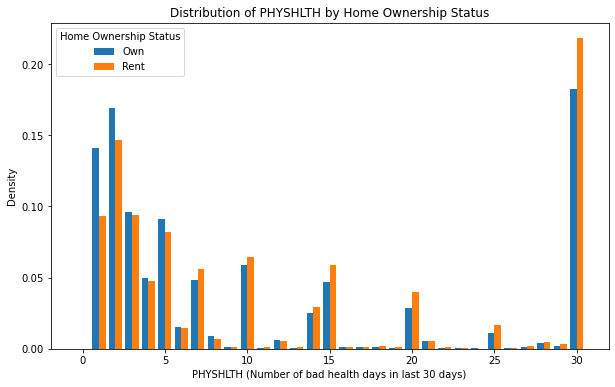

In [29]:
# Your code here

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset in chunks to avoid memory issues
chunk_size = 10000
chunks = pd.read_csv('case_study.csv', chunksize=chunk_size, low_memory=False)

# Initialize an empty dataframe to collect relevant rows
df = pd.DataFrame()

# Iterate over each chunk
for chunk in chunks:
    # Replace numeric codes with 'Own' and 'Rent' for RENTHOM1 column
    chunk['RENTHOM1'] = chunk['RENTHOM1'].replace({1: 'Own', 2: 'Rent'})
    
    # Filter to keep only the relevant rows
    filtered_chunk = chunk[chunk['RENTHOM1'].isin(['Own', 'Rent'])]
    
    # Append filtered rows to the final dataframe
    df = pd.concat([df, filtered_chunk])

# Group the data by home ownership status (Own vs Rent)
own = df.loc[df["RENTHOM1"] == "Own", "PHYSHLTH"]
rent = df.loc[df["RENTHOM1"] == "Rent", "PHYSHLTH"]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the distribution of PHYSHLTH for Own vs Rent
ax.hist(
    x=[own, rent],
    label=["Own", "Rent"],
    bins=range(32),
    align="left",
    density=True
)

# Add labels and title
ax.set_xlabel("PHYSHLTH (Number of bad health days in last 30 days)")
ax.set_ylabel("Density")
ax.set_title("Distribution of PHYSHLTH by Home Ownership Status")

# Add legend
ax.legend(title="Home Ownership Status")

# Show the plot
plt.show()


Then run this code to find the averages:

In [30]:
# Run this cell without changes
df.groupby("RENTHOM1")["PHYSHLTH"].mean()

RENTHOM1
Own     62.139282
Rent    56.663557
Name: PHYSHLTH, dtype: float64

Now, interpret the plot and averages. Does it seem like there a difference in the number of unhealthy days between those who rent their homes and those who own their homes? How does this compare to the distributions by state?

In [31]:
# Replace None with appropriate text
"""
Based on the plot, it seems like there is a slight difference in the distribution of unhealthy days (PHYSHLTH) between those who rent and those who own their homes. Renters appear to have a slightly higher frequency of unhealthy days at the higher end of the distribution. However, the overall shape of the distribution is quite similar between the two groups.

When comparing this to the distribution by state, the difference between renters and owners seems to be more pronounced, with renters experiencing slightly more unhealthy days on average. In contrast, the distributions by state showed less noticeable differences.

We will need to confirm this observation by looking at the mean values for both groups.
"""



'\nBased on the plot, it seems like there is a slight difference in the distribution of unhealthy days (PHYSHLTH) between those who rent and those who own their homes. Renters appear to have a slightly higher frequency of unhealthy days at the higher end of the distribution. However, the overall shape of the distribution is quite similar between the two groups.\n\nWhen comparing this to the distribution by state, the difference between renters and owners seems to be more pronounced, with renters experiencing slightly more unhealthy days on average. In contrast, the distributions by state showed less noticeable differences.\n\nWe will need to confirm this observation by looking at the mean values for both groups.\n'

Now, choose and execute an appropriate statistical test. Make sure you describe why you chose the test, the null and alternative hypotheses, and what the result of the test means.

In [32]:
# Your code here (create additional cells as needed)
from scipy import stats

# Group the data by home ownership status
own = df.loc[df["RENTHOM1"] == "Own", "PHYSHLTH"]
rent = df.loc[df["RENTHOM1"] == "Rent", "PHYSHLTH"]

# Perform an independent two-sample t-test
t_stat, p_value = stats.ttest_ind(own, rent, nan_policy='omit')

# Output the t-statistic and p-value
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean number of unhealthy days between those who own and those who rent.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean number of unhealthy days between those who own and those who rent.")


T-statistic: 12.402056607769849
P-value: 3.057998738455495e-35
Reject the null hypothesis. There is a significant difference in the mean number of unhealthy days between those who own and those who rent.


## 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Once again, this will require some preparation before we can run the statistical test. Create a new column `NICOTINE_USE` with 1 representing someone who uses or has used nicotine in some form, and 0 representing someone who hasn't.

We define nicotine use as:

* Answered `Yes` to the `SMOKE100` question (*Have you smoked at least 100 cigarettes in your entire life?*, page 43), OR
* Answered `Every day` or `Some days` to the `USENOW3` question (*Do you currently use chewing tobacco, snuff, or snus every day, some days, or not at all?*, page 46), OR
* Answered `Yes` to the `ECIGARET` question (*Have you ever used an e-cigarette or other electronic vaping product, even just one time, in your entire life?*, page 46)

If a record matches one or more of the above criteria, `NICOTINE_USE` should be 1. Otherwise, `NICOTINE_USE` should be 0. Go ahead and keep all of the "Don't know" or "Refused" answers as 0.

In [34]:
# Your code here
# Create NICOTINE_USE column based on conditions
df['NICOTINE_USE'] = (
    (df['SMOKE100'] == 1) | 
    (df['USENOW3'].isin([1, 2])) | 
    (df['ECIGARET'] == 1)
).astype(int)

# Display the first few rows to verify the new column
df[['SMOKE100', 'USENOW3', 'ECIGARET', 'NICOTINE_USE']].head()


,SMOKE100,USENOW3,ECIGARET,NICOTINE_USE
0,2.0,3.0,2.0,0
1,2.0,3.0,2.0,0
2,2.0,3.0,2.0,0
3,2.0,3.0,2.0,0
4,1.0,3.0,2.0,1


In [35]:
# Look at the distribution of values
df["NICOTINE_USE"].value_counts(normalize=True)

0    0.563198
1    0.436802
Name: NICOTINE_USE, dtype: float64

This time, let's treat health status as a categorical variable. We'll say that a "chronically sick" person is a person who reports that their physical health was not good for 15 or more out of the past 30 days. (This is a simplification but it will work for this analysis.)

In the cell below, create a new column of `df` called `CHRONIC`, which is 0 for records where `PHYSHLTH` is less than 15, and 1 for records where `PHYSHLTH` is 15 or more.

In [37]:
# Your code here

# Create the CHRONIC column based on the value of PHYSHLTH
df['CHRONIC'] = (df['PHYSHLTH'] >= 15).astype(int)

# View the distribution of the newly-created CHRONIC column
df['CHRONIC'].value_counts()



1    24640
0     8027
Name: CHRONIC, dtype: int64

Now we can view the crosstabs for these two categorical variables, as well as display their distributions:

In [38]:
# Run this cell without changes
contingency_table = pd.crosstab(index=df["CHRONIC"], columns=df["NICOTINE_USE"])
contingency_table

NICOTINE_USE,0,1
CHRONIC,,
0,4408,3619
1,13990,10650


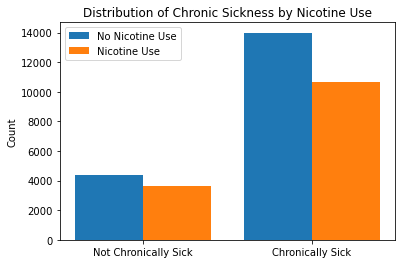

In [39]:
# Run this cell without changes

no_nicotine_use = df.loc[df["NICOTINE_USE"] == 0, "CHRONIC"]
nicotine_use = df.loc[df["NICOTINE_USE"] == 1, "CHRONIC"]

fig, ax = plt.subplots()

ax.hist(
    x=[no_nicotine_use, nicotine_use],
    label=["No Nicotine Use", "Nicotine Use"],
    bins=[0,1,2],
    align="left"
)

ax.set_ylabel("Count")
ax.set_xticks([0,1])
ax.set_xticklabels(["Not Chronically Sick", "Chronically Sick"])
ax.set_title("Distribution of Chronic Sickness by Nicotine Use")

ax.legend();

Once again, it appears that there is a difference in health outcomes between these categories. In the cell below, select an appropriate statistical test, describe the null and alternative hypotheses, execute the test, and interpret the result.

In [40]:
# Your code here (create additional cells as needed)
import scipy.stats as stats

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Output the test results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between nicotine use and chronic sickness.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between nicotine use and chronic sickness.")


Chi-Square Statistic: 8.465941454107535
P-value: 0.003618579128422808
Degrees of Freedom: 1
Expected Frequencies:
[[ 4520.79303272  3506.20696728]
 [13877.20696728 10762.79303272]]
Reject the null hypothesis. There is a significant association between nicotine use and chronic sickness.


## 5. Choose Your Own Question

Now that you have investigated physical health and chronic sickness and their relationships with state, home ownership, and nicotine use, you will conduct a similar investigation with variables of your choosing.

Select an independent variable based on looking at the information in the data dictionary, and perform any additional transformations needed to use it in an analysis. Then set up, execute, and interpret a statistical test that addresses the relationship between that independent variable and `PHYSHLTH`.

(There is no solution branch for this question, and feel free to move on if you have already spent more than 1.5 hours on this lab.)

o investigate the relationship between a new independent variable and PHYSHLTH, we can follow these steps:

Step 1: Select an Independent Variable
First, we’ll look at the variables available in the data dictionary and select one that could be interesting. For this analysis, let's choose income level (INCOME2), which is a categorical variable representing different income brackets.

Step 2: Investigate the Relationship Between Income and Physical Health (PHYSHLTH)
We can treat INCOME2 as a categorical variable and compare how the number of unhealthy days (PHYSHLTH) varies across different income groups.

Step 3: Formulate Hypotheses
Null Hypothesis (H₀): The mean number of unhealthy days does not vary by income level.
𝐻
0
:
𝜇
low-income
=
𝜇
high-income
H 
0
​
 :μ 
low-income
​
 =μ 
high-income
​
 
Alternative Hypothesis (H₁): The mean number of unhealthy days varies by income level.
𝐻
1
:
𝜇
low-income
≠
𝜇
high-income
H 
1
​
 :μ 
low-income
​
 

=μ 
high-income
​
 
Step 4: Execute the Analysis
We'll start by cleaning the data, ensuring that income categories are properly labeled and then conducting an ANOVA test to see if there is a significant difference in mean unhealthy days between different income groups.

In [41]:
# Your code here (create additional cells as needed)

# Replace the numeric income codes with more descriptive labels
income_mapping = {
    1: "Less than $10,000",
    2: "$10,000 to $15,000",
    3: "$15,000 to $20,000",
    4: "$20,000 to $25,000",
    5: "$25,000 to $35,000",
    6: "$35,000 to $50,000",
    7: "$50,000 to $75,000",
    8: "More than $75,000"
}

df['INCOME2'] = df['INCOME2'].map(income_mapping)

# Drop any rows where income is missing (if necessary)
df = df.dropna(subset=['INCOME2', 'PHYSHLTH'])

# Group the data by income and calculate the mean number of unhealthy days
income_groups = df.groupby('INCOME2')['PHYSHLTH'].mean()
print("Mean PHYSHLTH by Income Group:")
print(income_groups)

# Perform ANOVA to test for differences in mean unhealthy days across income groups
income_values = [df[df['INCOME2'] == income]['PHYSHLTH'] for income in income_mapping.values()]
f_stat, p_value = stats.f_oneway(*income_values)

# Output the results of the ANOVA test
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation of the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The mean number of unhealthy days varies significantly by income level.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in unhealthy days across income levels.")


Mean PHYSHLTH by Income Group:
INCOME2
$10,000 to $15,000    49.023121
$15,000 to $20,000    55.045672
$20,000 to $25,000    55.876399
$25,000 to $35,000    58.051143
$35,000 to $50,000    59.787066
$50,000 to $75,000    60.875621
Less than $10,000     49.051724
More than $75,000     63.753519
Name: PHYSHLTH, dtype: float64
F-statistic: 55.48343765920742
P-value: 2.787701162759889e-79
Reject the null hypothesis. The mean number of unhealthy days varies significantly by income level.


## Conclusion

Congratulations, another cumulative lab down! In this lab you practiced reading a data dictionary, performing various data transformations with pandas, and executing statistical tests to address business questions.